## 1) Spark Initializing

In [1]:
import findspark
findspark.init()
import pyspark
import pandas as pd
import seaborn as sns # To get graphs
import matplotlib.pyplot as plt # To get graphs

In [2]:
#### First we have create a spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('Preprocessing') \
                    .getOrCreate()

## 2) Importing Data

In [12]:
df = pd.read_csv("/Users/Asus/Documents/InternCsv/Summation_Dispatch.csv",index_col=False)

In [13]:
df.head(5)

,Unnamed: 0,Plant,Actual_Dispatch,Forecasted_Dispatch,DispatchDiff
0,0,ACE EMBP,134409.0,61367.0,73042.0
1,1,ACE Matara,27330.0,14225.0,13105.0
2,2,ALTAQQA-Mahi.,1451.0,650.0,801.0
3,3,ALTAQQA-Pol.,1656.0,528.0,1128.0
4,4,Asia Power,34513.0,23497.0,11016.0


In [15]:
df=df.drop('Unnamed: 0',axis=1)

In [16]:
df.head(5)

,Plant,Actual_Dispatch,Forecasted_Dispatch,DispatchDiff
0,ACE EMBP,134409.0,61367.0,73042.0
1,ACE Matara,27330.0,14225.0,13105.0
2,ALTAQQA-Mahi.,1451.0,650.0,801.0
3,ALTAQQA-Pol.,1656.0,528.0,1128.0
4,Asia Power,34513.0,23497.0,11016.0


In [17]:
# 'os' module provides functions for interacting with the operating system 
import os

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore") 

In [18]:
df.shape

(36, 4)

## 3) Checking the datatypes of the columns

In [19]:
df.dtypes

Plant                   object
Actual_Dispatch        float64
Forecasted_Dispatch    float64
DispatchDiff           float64
dtype: object

## 4) Summary Statistics of the data

In [20]:
# Summary Statistics for Numerical data:
df.describe()

,Actual_Dispatch,Forecasted_Dispatch,DispatchDiff
count,36.000000,36.000000,36.000000
mean,95874.638889,48965.472222,46909.166667
std,161125.799270,80548.080869,80670.562802
min,0.000000,0.000000,-4599.000000
25%,10791.750000,4581.000000,6333.000000
50%,36565.500000,20917.000000,16650.500000
75%,84124.750000,47332.000000,42021.750000
max,562074.000000,279720.000000,282584.000000


In [21]:
# Summary Statistics for Categorical data:
df.describe(exclude=[np.number])

,Plant
count,36
unique,36
top,ACE EMBP
freq,1


### 5) Finding Missing Values

In [22]:
# use isnull().sum() to check for missing values 
df.isnull().sum() 

Plant                  0
Actual_Dispatch        0
Forecasted_Dispatch    0
DispatchDiff           0
dtype: int64

There are no missing values in the data.

**Sk-learn library** has an in-built function called Iterative Imputer to impute the missing values. Its sklearn domcumentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

### 6) Outlier Treatment

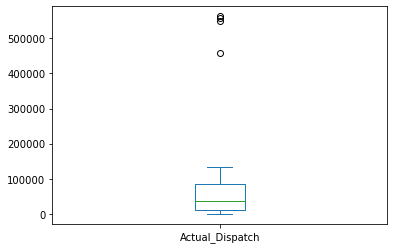

In [24]:
# For Actual Dispatches
df['Actual_Dispatch'].plot(kind='box')
plt.show()

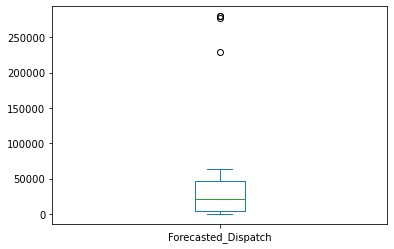

In [25]:
# For Forcast Dispatches
df['Forecasted_Dispatch'].plot(kind='box')
plt.show()

We can see that there are no outliers in the **Actual_Amount** column and some outliers are present in the **Forcast Dispatch** column. To treat for outliers can either cap the values or transform the data. Shall demonstrate both the approaches here.

### 7) Transformation

#### 7a) SQRT transformation

In [26]:
df['SQRT_ActualDis'] = df['Actual_Dispatch']**0.5

In [27]:
df['sqrt_Actual'] = np.sqrt(df['Actual_Dispatch'])

In [28]:
df.head(4)

,Plant,Actual_Dispatch,Forecasted_Dispatch,DispatchDiff,SQRT_ActualDis,sqrt_Actual
0,ACE EMBP,134409.0,61367.0,73042.0,366.618330,366.618330
1,ACE Matara,27330.0,14225.0,13105.0,165.317876,165.317876
2,ALTAQQA-Mahi.,1451.0,650.0,801.0,38.091994,38.091994
3,ALTAQQA-Pol.,1656.0,528.0,1128.0,40.693980,40.693980


In [29]:
#checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the original data is {}".format(df.Actual_Dispatch.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_ActualDis.skew()))

print('')

print("The kurtosis of the original data is {}".format(df.Actual_Dispatch.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_ActualDis.kurt()))

The skewness of the original data is 2.3708219192644147
The skewness of the SQRT transformed data is 1.4444405842311796

The kurtosis of the original data is 4.398656106982564
The kurtosis of the SQRT transformed data is 1.7242490571054248


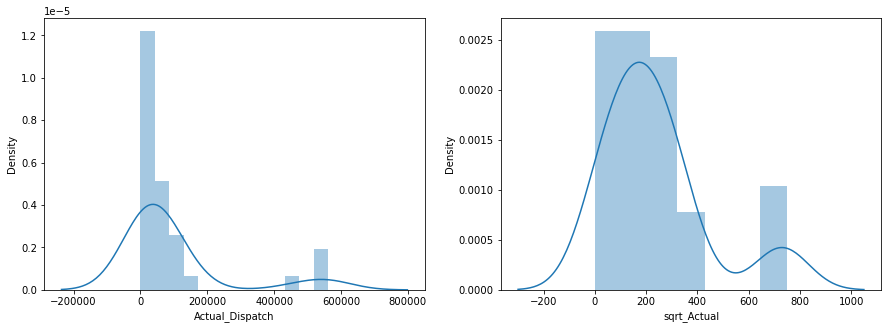

In [30]:
# plotting the distribution

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['Actual_Dispatch'], ax=axes[0])
sns.distplot(df['sqrt_Actual'], ax=axes[1])

plt.show()


### Result:

The **Actual_Dispatch** column was right skewed earlier. The skewness and kurtosis as reduced significantly. The transformed SQRT rate, on the right graph resembles normal distribution now.

### 7b. Log Transformation

In [44]:
df['Log_Rate'] = np.log2(df['Actual_Dispatch']+1)

In [46]:
#df=df.drop('Log Rate',axis=1)
df.head(5)

,Plant,Actual_Dispatch,Forecasted_Dispatch,DispatchDiff,SQRT_ActualDis,sqrt_Actual,Log_Rate
0,ACE EMBP,134409.0,61367.0,73042.0,366.618330,366.618330,17.036281
1,ACE Matara,27330.0,14225.0,13105.0,165.317876,165.317876,14.738251
2,ALTAQQA-Mahi.,1451.0,650.0,801.0,38.091994,38.091994,10.503826
3,ALTAQQA-Pol.,1656.0,528.0,1128.0,40.693980,40.693980,10.694358
4,Asia Power,34513.0,23497.0,11016.0,185.776748,185.776748,15.074894


In [47]:
df.Log_Rate.skew()

-2.003402765338191

In [48]:
print("The skewness of the original data is {}".format(df.Actual_Dispatch.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_ActualDis.skew()))
#print("The skewnss of the LOG transformed data is {}".format(df['Log Rate'].skew()))
print("The skewnss of the LOG transformed data is {}".format(df.Log_Rate.skew()))

print('')


print("The kurtosis of the original data is {}".format(df.Actual_Dispatch.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_ActualDis.kurt()))
print("The skewnss of the LOG transformed data is {}".format(df.Log_Rate.skew()))

The skewness of the original data is 2.3708219192644147
The skewness of the SQRT transformed data is 1.4444405842311796
The skewnss of the LOG transformed data is -2.003402765338191

The kurtosis of the original data is 4.398656106982564
The kurtosis of the SQRT transformed data is 1.7242490571054248
The skewnss of the LOG transformed data is -2.003402765338191


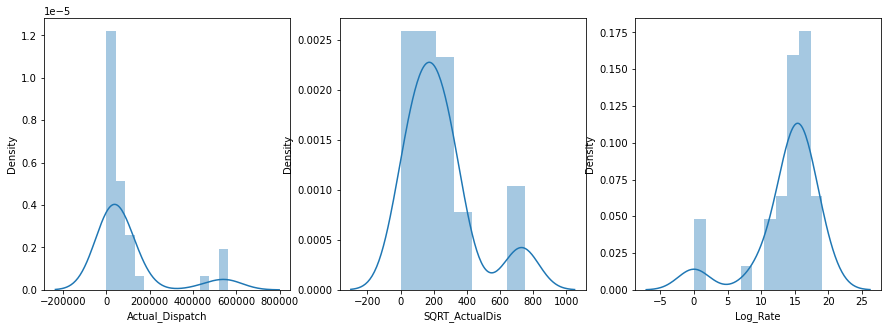

In [49]:
# plot the graph:

fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['Actual_Dispatch'], ax=axes[0])
sns.distplot(df['SQRT_ActualDis'], ax=axes[1])
sns.distplot(df['Log_Rate'], ax=axes[2])

plt.show()

### Inference:
**Log Transformation made the rate left skewed and more peaked.**

However, Log transformation is more closer to 0 and hence is more normal. Though it heavily maniupulates the data.

In our case, square root transformation is more suitable.

In [50]:
## Using Lambda function :

#df['LOG_Rate'] = df['Actual_Dispatch'].apply(lambda x:np.log(x))

### 8)  Outliers Treatment using Capping Approach

#### 1) Z-Score approach to treat Outliers:
All the values above 3 standard deviation and below -3 standard deviation are outliers and can be removed

In [51]:
df1 = pd.read_csv("/Users/Asus/Documents/InternCsv/Summation_Dispatch.csv",index_col=False)

In [52]:
df1.dtypes

Unnamed: 0               int64
Plant                   object
Actual_Dispatch        float64
Forecasted_Dispatch    float64
DispatchDiff           float64
dtype: object

In [53]:
df1=df1.drop('Unnamed: 0',axis=1)

***Using SciPy Library to calculate the Z-Score:***

In [55]:
# 'SciPy' is used to perform scientific computations
import scipy.stats as stats

In [56]:
# Creating new variable with Z-score of each record:
df1['ZR'] = stats.zscore(df1['Actual_Dispatch'])

In [57]:
df1.head(10)

,Plant,Actual_Dispatch,Forecasted_Dispatch,DispatchDiff,ZR
0,ACE EMBP,134409.0,61367.0,73042.0,0.242549
1,ACE Matara,27330.0,14225.0,13105.0,-0.431445
2,ALTAQQA-Mahi.,1451.0,650.0,801.0,-0.594337
3,ALTAQQA-Pol.,1656.0,528.0,1128.0,-0.593047
4,Asia Power,34513.0,23497.0,11016.0,-0.386233
5,Barge,107826.0,56437.0,51389.0,0.075226
6,Bowa,18718.0,9166.0,9552.0,-0.485652
7,CEB Sup Power,7920.0,1316.0,6604.0,-0.553619
8,Canyon,26068.0,13899.0,12169.0,-0.439389
9,KCCP,0.0,0.0,0.0,-0.603470


In [59]:
# Combined Lower limit and Upper limit:

df1[(df1['ZR']<-2.85) | (df1['ZR']>2.85)]

,Plant,Actual_Dispatch,Forecasted_Dispatch,DispatchDiff,ZR
14,LVPS 1,562074.0,279490.0,282584.0,2.934430
15,LVPS 2,556148.0,279720.0,276428.0,2.897130
16,LVPS 3,549420.0,277356.0,272064.0,2.854781


In [60]:
# count of outliers:

df1[(df1['ZR']<-2.85) | (df1['ZR']>2.85)].shape[0]

3

In [61]:
### Cleaned Data: without outliers so z>-3 and z< +3

df2= df1[(df1['ZR']<-2.85) | (df1['ZR']>2.85)]
df2.head()

,Plant,Actual_Dispatch,Forecasted_Dispatch,DispatchDiff,ZR
14,LVPS 1,562074.0,279490.0,282584.0,2.934430
15,LVPS 2,556148.0,279720.0,276428.0,2.897130
16,LVPS 3,549420.0,277356.0,272064.0,2.854781


In [62]:
df1.shape

(36, 5)

In [63]:
df2.shape

(3, 5)

### Interpretation:
A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

In [64]:
df3 = df2.copy()

In [65]:
df3.drop(columns = ['ZR'], inplace=True)
df3.head()

,Plant,Actual_Dispatch,Forecasted_Dispatch,DispatchDiff
14,LVPS 1,562074.0,279490.0,282584.0
15,LVPS 2,556148.0,279720.0,276428.0
16,LVPS 3,549420.0,277356.0,272064.0


### 2) IQR Method to treat Outliers:
All the values below **Q1 - 1.5IQR** and values above **Q3 + 1.5IQR** are outliers and can be removed.

In [67]:
# finding the Quantiles:

Q1 = df3.Actual_Dispatch.quantile(0.25)
Q2 = df3.Actual_Dispatch.quantile(0.50)
Q3 = df3.Actual_Dispatch.quantile(0.75)

# IQR : Inter-Quartile Range

IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

543293.5

568601.5

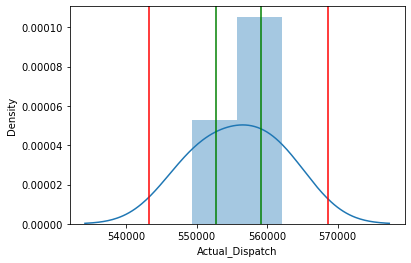

In [68]:
## Plot

sns.distplot(df3.Actual_Dispatch)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [70]:
# Find count of Outliers wrt IQR

df3[(df3.Actual_Dispatch<LC) | (df3.Actual_Dispatch>UC)]

,Plant,Actual_Dispatch,Forecasted_Dispatch,DispatchDiff


In [71]:
## Store the clean data wrt IQR:

df4 = df3[(df3.Actual_Dispatch>LC) & (df3.Actual_Dispatch<UC)]
df4.head()

,Plant,Actual_Dispatch,Forecasted_Dispatch,DispatchDiff
14,LVPS 1,562074.0,279490.0,282584.0
15,LVPS 2,556148.0,279720.0,276428.0
16,LVPS 3,549420.0,277356.0,272064.0


## 9. Scaling the Numerical Features

**1) Standardization (Z-Score)**

Can by done manually as well as have in-built functions in sklearn.

### Standardization (Z-Score)
Scales the data using the formula (x-mean)/standard deviation

**Manually**

In [72]:
# for Rate :
avg_rate = df3['Actual_Dispatch'].mean()
avg_rate

555880.6666666666

In [73]:
std_rate = df3['Actual_Dispatch'].std()
std_rate

6331.234424133522

In [74]:
# Step 1 : transform using Z-score
df3['Z_Score_Rate'] = (df3['Actual_Dispatch'] - avg_rate)/std_rate

In [75]:
df3.head()

,Plant,Actual_Dispatch,Forecasted_Dispatch,DispatchDiff,Z_Score_Rate
14,LVPS 1,562074.0,279490.0,282584.0,0.978219
15,LVPS 2,556148.0,279720.0,276428.0,0.042225
16,LVPS 3,549420.0,277356.0,272064.0,-1.020443


In [81]:
import scipy

In [82]:
scipy.stats.kurtosis(df3['Actual_Dispatch'],bias=False)

-1.5000000000000022

In [83]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df3.Actual_Dispatch.skew()))
print("The kurtosis for the original data is {}.".format(scipy.stats.kurtosis(df3['Actual_Dispatch'],bias=False)))
#print("The kurtosis for the original data is {}.".format(df3.rate.kurt()))
print('')

print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_Rate.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(scipy.stats.kurtosis(df3['Z_Score_Rate'],bias=False)))

The skewness for the original data is -0.18967156777589084.
The kurtosis for the original data is -1.5000000000000022.

The skewness for the Zscore Scaled column is -0.1896715677759458.
The kurtosis for the Zscore Scaled columns is -1.5.


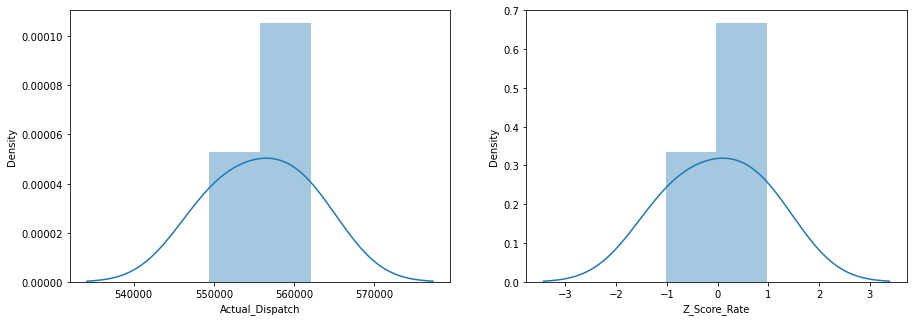

In [86]:
# Distribution of the columns

fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(df3['Actual_Dispatch'], ax=axes[0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[1])


plt.show()

The only difference between the two curves is of the Range on the x-axis. The impact of scaling on data is: Skewness, Kurtosis and Distribution all remain same.

### The need for Scaling is :

1) Comparison between variables is easier
2) Computation power is more efficient and less time consuming.